# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [X] YES - make available
* [  ] NO - keep private

# Overview

Yelp has normalized the reviewing of businesses. This system has benefited its users by allowing them to read on other people’s experiences and opinions, along with updating them on the business’s amenities. This can be either problematic or valuable to businesses. It allows them to receive feedback on how to improve their business and either attracts or dissuades potential customers. In the modern day, Yelp tends to play a factor in and reflect a business’s success. Our project analyzes Yelp data to determine the effects of a business’s location on a business’s success (based off the area and environment it is in). This analysis is used to determine the likelihood of a business’s success based on the location it is set up in. 

# Names

- Shih Wen Ma
- Andrea Diaz
- Viet Nguyen
- Manda Tran
- Matthew Luu

# Group Members IDs

- A15469802
- A15084975
- A13702483
- A14452168
- A16067866

# Research Question

How does the state a restaurant is located in (specifically the United States) affect the success of restaurants? Can you predict a restaurant’s success based on the location?

## Background and Prior Work

Yelp is an online service in which anyone with an account can comment on and/or rate a business. It allows users to make informed decisions on whether or not they want to receive services from them. For businesses, it is a platform for them to receive feedback on their services, such as what customers would like to see and what improvements they can make. This platform is used by both sides to gauge how successful and/or promising a business is. As such, we focus on Yelp data to help us determine the success of a restaurant (determined by ratings and number of reviews) based on location. 

When evaluating whether a Yelp data set is the most appropriate for our question, we analyzed the credibility and bias of the dataset. We researched possible factors that could affect the accuracy of the dataset in reflecting the success of a restaurant. One major question we asked is: “Is the data corrupt?”. Upon further research, we found that Yelp does manipulate reviews. They filter out data that they think are fake, but this algorithm is not always correct. The filter affects the success because it is manipulating the data, thus removing data that could potentially affect the ratings of the business. In addition, they accept payments from businesses to advertise for them and/or hide bad reviews while highlighting more favorable ones. This would skew the data because it means that restaurants who pay Yelp to do this are more likely to receive more customers and reviews, thus making the business (seem) more successful than its competitors. Another major aspect we considered was how the bandwagon effect could affect the ratings of a restaurant. We found that current ratings do affect future ratings, which further cements the skew of the data. This affects small businesses, as they are often overshadowed by larger businesses who have the resources to pay Yelp for advertisements and extra services. 

We have decided to move forward with using the Yelp dataset with these concerns in mind. We concluded that while these factors may affect the accuracy in reflecting the success of a restaurant, they also affect the success of the restaurant. These factors change the way the business is reflected through Yelp, a popular platform used by people to determine whether or not they want to utilize the business’s services. By playing a role in a potential customer’s choice in utilizing the service, Yelp indirectly affects the success of the restaurant. Therefore, it is safe to continue using the Yelp dataset, given that these factors also influence the restaurant’s success. 

While doing initial research on Yelp dataset, we came across the Yelp Dataset Challenge. We noticed 2-3 projects that had to do with predicting the success of a business. For example, one project predicted success based on the text in the reviews which were analyzed based on sentiment (reference #5) using machine learning models. However, we could not find any projects or reports that looked into the effect of different locations on the ratings of restaurants which is why we thought it would be an interesting topic to focus on. 

References (include links):
- 1) The Yelp Review Filter: https://vivial.net/blog/how-to-avoid-the-yelp-review-filter-and-get-more-positive-reviews/
- 2) The Yelp Effect https://rbj.rady.ucsd.edu/index.php/topics/social-impact/2014/01/the-yelp-effect/
- 3) Fake Yelp Reviews
    - https://smallbusiness.yahoo.com/advisor/writing-fake-reviews-yelp-might-sued-173135209.html
    - https://www.businessinsider.com/20-percent-of-yelp-reviews-fake-2013-9
- 4) The Yelp Factor https://hbswk.hbs.edu/item/the-yelp-factor-are-consumer-reviews-good-for-business
- 5) Yelp Dataset Challenge 1 https://github.com/VC444/Yelp-Dataset-Challenge 

# Hypothesis


Location will have a large effect on the rating because it sets up the environment and customer expectations the business needs to fulfill. The most popular type of food in a specific area will be set at a higher standard by the consumers and therefore have harsher ratings. For example, we believe that if Mexican food is very popular in San Diego, then Chipotle chain restaurants, known for its Mexican-style cuisine, will generally have lower ratings due to the fact that there are more local restaurants that specialize in Mexican food. Therefore, we will also place an emphasis on chain restaurants and compare our findings to local restaurants. 

# Dataset(s)

- Dataset Name: Yelp Categories (categories.json)
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/all_category_list
- Number of observations: 1,563 observations

This data was used to gather all the relevant categories to collect our data using the Yelp API. We found the categories by finding all the rows who's parent category contained 'restaurant' in it.


- Dataset Name: Yelp Restaurant Data Across America
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 150,980 observations

The data was collected by using a Yelp API and the github repo: https://github.com/gfairchild/yelpapi. We used the dataset categories.json to find all the relevant restaurant categories and ran a search query for each state. The data contains the name of the restaurant, the location (including latitude and longitude), the average rating, the applicable categories, and the number of customer reviews.


- Dataset Name: Fast Food Restaurants Across America
- Link to the dataset: https://www.kaggle.com/datafiniti/fast-food-restaurants#FastFoodRestaurants.csv
- Number of observations: 10,000 observations

This dataset provides information about 10,000 fast food restaurants across America. The data was collected from Datafiniti's Business Database in March 2018. We are using this dataset to understand which fast food chains are the most popular across the US (per state) based on the number of locations. While the data comes from a reliable source, the completion of the dataset is cannot be confirmed because there was no free option to download the data directly from the source so we had to download the data from kaggle.com. The data includes the fast food restaurant, its location, and website.


# Setup

In [1]:
# uncomment below if not yet installed
#!pip install --user geopandas
#!pip install --user descartes

In [2]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import shapely.geometry as shp

Import dataframes from csv files

In [3]:
yelp_df = pd.read_csv('data/cuisine.csv')
fast_df = pd.read_csv('data/FastFoodRestaurants.csv')
fast_ratings_df = pd.read_csv('data/FastRatings.csv')

In [40]:
test_df = pd.read_csv('data/YelpRestaurants.csv')
test_df.shape

(150980, 8)

In [41]:
test_df = test_df.drop_duplicates()

In [43]:
test_df.shape
test_df

,Unnamed: 0,name,coordinates,category,location,rating,review_count,state
0,0,El Barrio,"{'latitude': 33.516636, 'longitude': -86.802849}","[{'alias': 'mexican', 'title': 'Mexican'}]","{'address1': '2211 2nd Ave N', 'address2': '',...",4.5,615,AL
1,1,Saw's Soul Kitchen,"{'latitude': 33.52419, 'longitude': -86.77383}","[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...","{'address1': '215 41st St S', 'address2': None...",4.5,782,AL
2,2,Yo' Mama's,"{'latitude': 33.51766, 'longitude': -86.80183}","[{'alias': 'newamerican', 'title': 'American (...","{'address1': '2328 2nd Ave N', 'address2': Non...",4.5,356,AL
3,3,Carrigan's Public House,"{'latitude': 33.5171239295806, 'longitude': -8...","[{'alias': 'cocktailbars', 'title': 'Cocktail ...","{'address1': '2430 Morris Ave', 'address2': ''...",4.5,527,AL
4,4,Highlands Bar & Grill,"{'latitude': 33.500572, 'longitude': -86.795577}","[{'alias': 'southern', 'title': 'Southern'}, {...","{'address1': '2011 11th Ave S', 'address2': ''...",4.5,298,AL
...,...,...,...,...,...,...,...,...
150975,150975,Penny Ann's Cafe,"{'latitude': 40.730936, 'longitude': -111.891403}","[{'alias': 'cafes', 'title': 'Cafes'}, {'alias...","{'address1': '1810 S Main St', 'address2': '',...",4.0,1077,UT
150976,150976,Valter's Osteria,"{'latitude': 40.762516, 'longitude': -111.896202}","[{'alias': 'italian', 'title': 'Italian'}]","{'address1': '173 W Broadway', 'address2': Non...",4.5,618,UT
150977,150977,Whiskey Street,"{'latitude': 40.7621595157823, 'longitude': -1...","[{'alias': 'lounges', 'title': 'Lounges'}, {'a...","{'address1': '323 S Main St', 'address2': '', ...",4.0,1065,UT
150978,150978,Zest Kitchen & Bar,"{'latitude': 40.7632679, 'longitude': -111.896...","[{'alias': 'gluten_free', 'title': 'Gluten-Fre...","{'address1': '275 S 200th W', 'address2': None...",4.5,782,UT


# Data Cleaning

Describe your data cleaning steps here.

In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [5]:
#turns all name to lowercase so capitalization does not affect analysis
for i in yelp_df.index:
    yelp_df.at[i,'name'] = yelp_df.at[i,'name'].lower()
for j in fast_df.index:
    fast_df.at[j, 'name'] = fast_df.at[j, 'name'].lower()
for k in fast_ratings_df.index:
    fast_ratings_df.at[k, 'name'] = fast_ratings_df.at[k, 'name'].lower()

#### Clean data in the yelp_df

In [6]:
# drop duplicate rows if there are any
yelp_df=yelp_df.drop_duplicates()
yelp_df=yelp_df.reset_index(drop=True)

In [7]:
#Separate longitude and latitude information from coordinates column for the yelp_df
yelp_df['latitude'] = np.nan
yelp_df['longitude'] = np.nan
for i in yelp_df.index:
    coord = yelp_df.at[i, 'coordinates']
    yelp_df.at[i, 'latitude'] = coord[coord.find(':') + 1 : coord.find(',')]
    yelp_df.at[i, 'longitude'] = coord[coord.find(':', coord.find(',') + 1) + 1 : coord.find('}')]

yelp_df = yelp_df.drop('coordinates',axis=1)

In [8]:
#Separate address information from location column for the yelp_df
yelp_df['address'] = ''
for i in yelp_df.index:
    address = yelp_df.at[i, 'location']
    yelp_df.at[i, 'address'] = address[address.find(':') + 3 : address.find(',') - 1]

yelp_df = yelp_df.drop('location', axis=1)

In [9]:
#Drop unnamed column from yelp_df
yelp_df = yelp_df.drop(['Unnamed: 0'], axis=1)

In [10]:
yelp_df

,name,category,rating,review_count,state,latitude,longitude,address
0,el barrio,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,618,AL,33.516636,-86.802849,2211 2nd Ave N
1,saw's soul kitchen,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.5,783,AL,33.524190,-86.773830,215 41st St S
2,yo' mama's,"[{'alias': 'newamerican', 'title': 'American (...",4.5,355,AL,33.517660,-86.801830,2328 2nd Ave N
3,carrigan's public house,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,527,AL,33.517124,-86.798646,2430 Morris Ave
4,highlands bar & grill,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.5,304,AL,33.500572,-86.795577,2011 11th Ave S
...,...,...,...,...,...,...,...,...
11215,albany restaurant bar & liquormart,"[{'alias': 'bars', 'title': 'Bars'}, {'alias':...",3.5,115,WY,41.131947,-104.815178,1506 Capitol Ave
11216,wasabi japanese grill & bar,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",3.5,118,WY,41.161270,-104.789620,4620 Grandview Ave
11217,l'osteria mondello,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,79,WY,41.159263,-104.804882,1507 Stillwater Ave
11218,destination taiwan,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",5.0,16,WY,41.160490,-104.776100,2634 Dell Range Blvd


#### List of top ten types of cuisine
We will be analyzing the ratings for the tope ten types of cuisine in the United States, along with American food.
source: https://www.thinktasty.com/the-most-popular-cuisines-in-the-united-states/

In [11]:
cuisine = ['american', 'mexican', 'thai', 'greek', 'indian', 'japanese', 
           'spanish', 'chinese', 'french', 'italian', 'mediterranean']

In [12]:
def find_avg_rating(category):
    cat_list = []
    for i in yelp_df.index:
        is_cat = category in yelp_df['category'].iloc[i]
        cat_list.append(is_cat)
    temp = yelp_df.assign(cat_clean = cat_list)
    temp_df = temp[temp['cat_clean'].values==True]
    return temp_df.groupby('state').rating.mean()
    
all_cuisine_ratings = {}
for cuis in cuisine:
    all_cuisine_ratings[cuis] = find_avg_rating(cuis)

In [13]:
states = list(yelp_df['state'].unique())

def format_avg_rating(category):
    ratings = []
    for state in states:
        try:
            ratings.append(category[state])
        except:
            ratings.append(np.nan)
    return ratings

american_ratings = format_avg_rating(all_cuisine_ratings['american'])
mexican_ratings = format_avg_rating(all_cuisine_ratings['mexican'])
thai_ratings = format_avg_rating(all_cuisine_ratings['thai'])
greek_ratings = format_avg_rating(all_cuisine_ratings['greek'])
indian_ratings = format_avg_rating(all_cuisine_ratings['indian'])
japanese_ratings = format_avg_rating(all_cuisine_ratings['japanese'])
spanish_ratings = format_avg_rating(all_cuisine_ratings['spanish'])
chinese_ratings = format_avg_rating(all_cuisine_ratings['chinese'])
french_ratings = format_avg_rating(all_cuisine_ratings['french'])
italian_ratings = format_avg_rating(all_cuisine_ratings['italian'])
med_ratings = format_avg_rating(all_cuisine_ratings['mediterranean'])

avg_ratings_data = {'state': states, 'american': american_ratings, 'mexican': mexican_ratings,
                   'thai': thai_ratings, 'greek': greek_ratings, 'indian': indian_ratings,
                   'japanese': japanese_ratings, 'spanish': spanish_ratings, 'chinese': chinese_ratings,
                   'french': french_ratings, 'italian': italian_ratings, 'mediterranean': med_ratings}
avg_ratings_df = pd.DataFrame(data=avg_ratings_data)
avg_ratings_df.head()

,state,american,mexican,thai,greek,indian,japanese,spanish,chinese,french,italian,mediterranean
0,AL,4.500000,4.5,4.5,NaN,NaN,NaN,NaN,NaN,4.500000,4.50,NaN
1,AK,4.071429,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN,4.25
2,AZ,4.000000,4.5,4.5,NaN,NaN,4.5,NaN,NaN,NaN,4.50,NaN
3,OK,4.363636,4.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.25,NaN
4,CA,4.125000,4.5,NaN,NaN,NaN,4.5,NaN,NaN,4.166667,4.25,NaN


In [14]:
# DATA CLEANING MEXICAN RESTAURANTS
mex_list = []
for i in yelp_df.index:
    is_mex = 'mexican' in yelp_df['category'].iloc[i]
    mex_list.append(is_mex)
temp = yelp_df.assign(mex=mex_list)
mexican = temp[temp['mex'].values==True]
#mexican.groupby('state').sum()
mexican_rating = mexican.groupby('state').rating.mean()
mexican_rating['AL']
#mexican.drop('mex', axis=1)

4.5

In [15]:
#DATA CLEANING for Japanese restaurants
jap_list = []
for i in yelp_df.index:
    is_jap = 'japanese' in yelp_df['category'].iloc[i]
    jap_list.append(is_jap)
temp = yelp_df.assign(jap=jap_list)
japanese = temp[temp['jap'].values==True]

jap_rating = japanese.groupby('state').rating.mean()
#jap_rating

In [16]:
#DATA CLEANING for Italian restaurants
ital_list = []
for i in yelp_df.index:
    is_ital = 'italian' in yelp_df['category'].iloc[i]
    ital_list.append(is_ital)
temp = yelp_df.assign(ital=ital_list)
italian = temp[temp['ital'].values==True]
ital_rating = italian.groupby('state').rating.mean()
#ital_rating

In [17]:
#DATA CLEANING for chinese restaurants
chin_list = []
for i in yelp_df.index:
    is_chin = 'chinese' in yelp_df['category'].iloc[i]
    chin_list.append(is_chin)
temp = yelp_df.assign(chin=chin_list)
chinese = temp[temp['chin'].values==True]

chinese_rating = chinese.groupby('state').rating.mean()
#chinese_rating

In [18]:
#DATA CLEANING for traditional American restaurants
amer_trad_list = []
for i in yelp_df.index:
    is_amer_trad = 'American (Traditional)' in yelp_df['category'].iloc[i]
    amer_trad_list.append(is_amer_trad)
temp = yelp_df.assign(amer=amer_trad_list)
american_trad = temp[temp['amer'].values==True]

american_trad_rating = american_trad.groupby('state').rating.mean()
#american_trad_rating

In [19]:
#DATA CLEANING for new American restaurants
amer_new_list = []
for i in yelp_df.index:
    is_amer_new = 'American (New)' in yelp_df['category'].iloc[i]
    amer_new_list.append(is_amer_new)
temp = yelp_df.assign(amer=amer_new_list)
american_new = temp[temp['amer'].values==True]

american_new_rating = american_new.groupby('state').rating.mean()
#american_new_rating

#### Clean data in the fast_ratings_df

In [20]:
# drop duplicate rows if there are any
fast_ratings_df=fast_ratings_df.drop_duplicates()
fast_ratings_df=fast_ratings_df.reset_index(drop=True)

In [21]:
to_drop = []
for i in fast_ratings_df.index:
    if ("'country': 'US'" in fast_ratings_df['location'][i]):
        continue
    else:
        to_drop.append(i)
fast_ratings_df = fast_ratings_df.drop(to_drop)
fast_ratings_df['state'].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [22]:
fast_ratings_df['state'].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [23]:
#Separate longitude and latitude information from coordinates column for the fast_ratings_df
fast_ratings_df['latitude'] = np.nan
fast_ratings_df['longitude'] = np.nan
for i in fast_ratings_df.index:
    coord = fast_ratings_df.at[i, 'coordinates']
    fast_ratings_df.at[i, 'latitude'] = coord[coord.find(':') + 1 : coord.find(',')]
    fast_ratings_df.at[i, 'longitude'] = coord[coord.find(':', coord.find(',') + 1) + 1 : coord.find('}')]

fast_ratings_df = fast_ratings_df.drop('coordinates',axis=1)

In [24]:
#Separate address information from location column for the fast_ratings_df
fast_ratings_df['address'] = ''
for i in fast_ratings_df.index:
    address = fast_ratings_df.at[i, 'location']
    fast_ratings_df.at[i, 'address'] = address[address.find(':') + 3 : address.find(',') - 1]

fast_ratings_df = fast_ratings_df.drop('location', axis=1)

In [25]:
# Drop unnamed column from fast_ratings_df
fast_ratings_df = fast_ratings_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [26]:
# there are ~11k restaurants in our general df
yelp_df.shape

(11220, 8)

In [27]:
# there are ~4k fast food restaurants in our fast food df
fast_ratings_df.shape 

(7988, 8)

In [28]:
# Our general df includes 48 states, and is missing AR and DE
yelp_df["state"].unique() 

array(['AL', 'AK', 'AZ', 'OK', 'CA', 'CO', 'CT', 'DC', 'KS', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KY', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [29]:
# our fastfood df includes 48 states, missing AK and RI
fast_ratings_df["state"].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [30]:
fast_ratings_df["state"].value_counts()

KY    844
TX    543
MO    502
IN    486
OH    432
AL    345
NC    335
VA    320
IL    313
SC    277
GA    252
AR    248
OK    241
MS    219
CA    217
LA    212
TN    183
IA    181
WV    161
NE    152
PA    148
NM    122
SD    114
WI    109
KS    105
UT     96
AZ     87
MN     84
NY     75
CO     64
FL     63
MI     63
WY     46
ND     45
MD     43
WA     38
ID     36
NV     36
ME     32
NJ     27
DE     24
OR     15
MT     14
NH     11
VT     10
MA      8
CT      8
HI      2
Name: state, dtype: int64

In [31]:
# our general df has no null values!
null_rows = yelp_df.isnull().any(axis=1)
yelp_df[null_rows].shape

(0, 8)

In [32]:
# our fast food df has no null values!
null_rows = fast_ratings_df.isnull().any(axis=1)
fast_ratings_df[null_rows].shape

(0, 8)

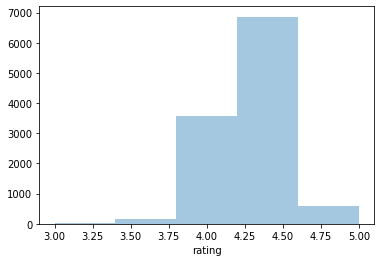

In [33]:
# Let's start by plotting histograms of general food rating and fast food rating
sns.distplot(yelp_df['rating'], kde=False, bins=5);

f1 = plt.gcf()

In [34]:
# There are 5 possible ratings in our data set: 3, 3.5, 4, 4.5, and 5
yelp_df["rating"].unique()

array([4.5, 4. , 5. , 3.5, 3. ])

In [35]:
# It appears that our rating data is normal-ish and is skewed right. We have a mean of 4.358 and an std of .294.
yelp_df["rating"].describe()

count    11220.000000
mean         4.350490
std          0.296148
min          3.000000
25%          4.000000
50%          4.500000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

Note that the fast food dataset doesn't have a rating column. We will need to merge the two datasets ...

In [36]:
# NOTE: do we need this cell anymore since we now have fast food ratings from fast_ratings_df?
# To get the ratings of the data found in the fast food dataset, we merge the yelp dataset (which has the ratings) with the fast food dataset 
# merged_df = fast_df
# merged_df['ratings'] = np.nan
#for i in fast_df.index:
#    for j in yelp_df.index:
#        if merged_df.at[i, 'name'] == yelp_df.at[j, 'name']:
#            if merged_df.at[i, 'address'] == yelp_df.at[j, 'address']:
#                merged_df.iloc[i].ratings = yelp_df.iloc[j].rating

#merged_df.dropna()

#print(merged_df)

In [37]:
#TODO: Explain what the merged df shows/means

In [38]:
# TODO: describe the lattitude/longitude data to see if there is any bias in geography for our 2 datasets

In [39]:
# TODO: maybe move the null row removal into the data cleanup section rather than analysis

### Fast Food Ratings Analysis

# Ethics & Privacy

In order to gain access to the data, we utilized several Yelp API keys at no charge. Anyone is able to  obtain the available data on Yelp, therefore we do have permission to use it. The API however does not return every business available, only the businesses that have Yelp-user generated content. In addition, we only found data for 48 states in which we’re missing the data for Arizona and Delaware. This is concerning because it excludes these populations. In addition, it seems that the restaurants listed in the yelp dataset do not include all ethnic groups (ex: there are no Korean restaurants listed). Furthermore, there are biases in our dataset because the data (reviews) is manipulated by Yelp and does not reflect the overall ratings of everyone who has written a review. In terms of privacy, our project should not have any major concerns as we are using information that has been released to the public, all which do not contain personal information. The data we are working with are on businesses, such as their location and amount of reviews. 
 
While our dataset has a potential bias, we have decided to continue on with using it. Our dataset may be missing 2 states, but we felt that missing 2 out of 50 states would not significantly change our results and analysis. One thing we must note is that we would be unable to predict the success of a restaurant if the location given were to be in Arizona or Delaware. We must also note that our prediction of a restaurant's success may be inaccurate for restaurants who identify as any of the ethnic groups not represented by the dataset. We have also decided to overlook Yelp’s manipulation of the reviews because it is also a factor that plays a role in the success or failure of a business, as mentioned in the Background and Prior Work section. In addition, there is little we can do about Yelp’s manipulation of data, as we only have permission to data that Yelp has legally consented to publicizing. 


# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions